In [1]:
import  numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Reading the dataset

In [2]:
data=pd.read_csv('mushrooms.csv')

# Examining the Dataset

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.shape

(8124, 23)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [8]:
#Unique occurrences of ‘class’ column
data['class'].unique()

array(['p', 'e'], dtype=object)

In [9]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


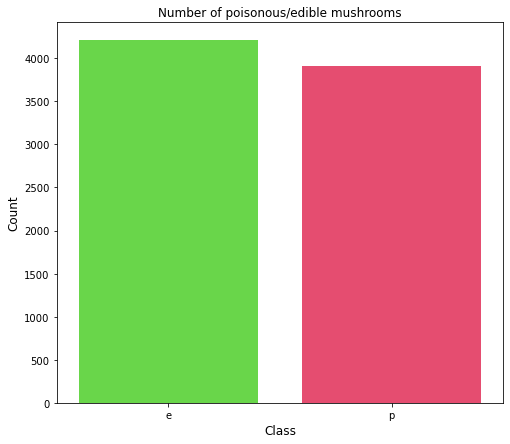

In [10]:
#Visualizing the count of edible and poisonous mushrooms
count = data['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
plt.show()

# Data Manipulation

The data is categorical so we’ll use LabelEncoder to convert it to ordinal

In [11]:
data_lben = data.astype('category')
data_lben.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [12]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in data_lben.columns:
    data_lben[column] = labelencoder.fit_transform(data_lben[column])

In [13]:
data_lben.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


All values in the column “veil-type” is 0 and not contributing to the data so we’ll remove it.

In [14]:
data1 = data_lben.drop(["veil-type"],axis=1)

In [15]:
data1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


# Correlation between the variables

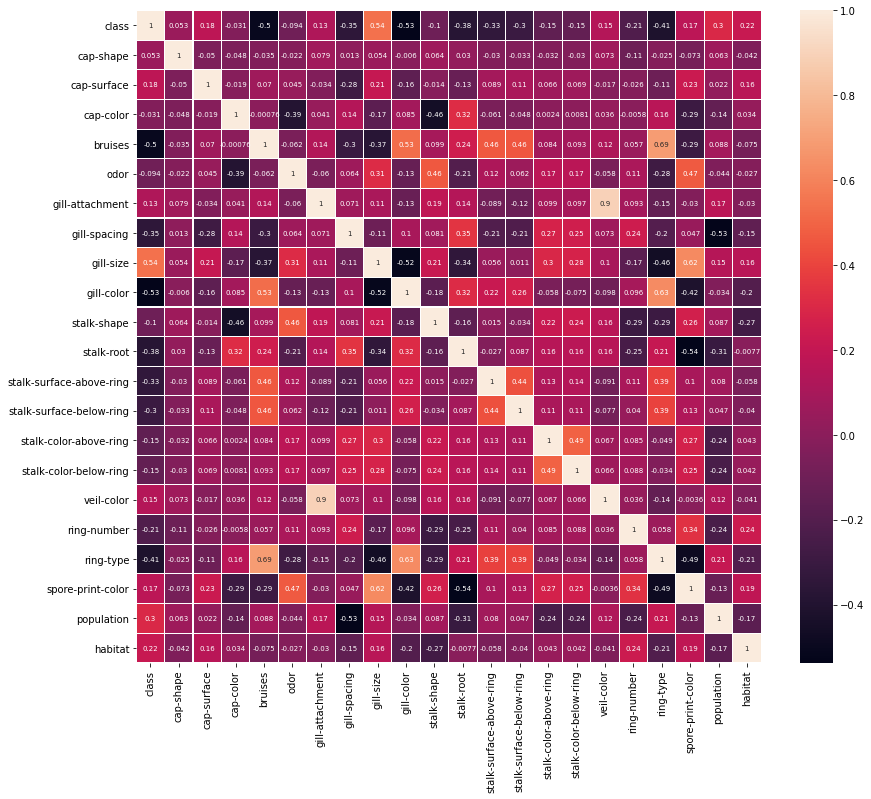

In [16]:
plt.figure(figsize=(14,12))
sns.heatmap(data1.corr(),linewidths=.1, annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);

The least correlating variable is the most important one for classification. In this case, “gill-color” is -0.53 and is the least correlated one

In [17]:
data1[['class', 'gill-color']].groupby(['gill-color'], as_index=False).mean().sort_values(by='class', ascending=False)

,gill-color,class
0,0,1.000000
8,8,1.000000
3,3,0.721311
2,2,0.670213
7,7,0.428954
11,11,0.255814
10,10,0.204659
4,4,0.156863
5,5,0.106870
9,9,0.097561


# Preparing the Data

In [18]:
from sklearn.model_selection import train_test_split
X = data1.drop(['class'], axis=1)
y = data1['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

# Fitting Gaussian Naive Bayes to the Training Set

In [19]:
from sklearn.naive_bayes import GaussianNB
nb_g = GaussianNB()
nb_g.fit(X_train, y_train)

GaussianNB()

# Prediction and Accuracy of the test set result

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = nb_g.predict(X_test)
accuracy_score(y_test, y_pred)

0.9261992619926199

# Making the Confusion Matrix

In [22]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[397  36]
 [ 24 356]]


# Fitting Bernoulli Naive Bayes to the Training Set

In [23]:
from sklearn.naive_bayes import BernoulliNB
nb_b = BernoulliNB()
nb_b.fit(X_train, y_train)

BernoulliNB()

# Prediction and Accuracy of the test set result

In [25]:
y_pred = nb_b.predict(X_test)
accuracy_score(y_test, y_pred)

0.8548585485854858

# Making the Confusion Matrix

In [26]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[408  25]
 [ 93 287]]


From the analysis the best fitting Naive Bayes classifier to predict the mushroom is poisonous or edible is Gaussion NB classifier

# Predictions

In [27]:
#Predicting some of the X_test results and matching it with  y_test values using Gaussian Naive Bayes classifier
prediction = nb_g.predict(X_test)
print(prediction[:36])
print(y_test[:36].values)
#0-Edible
#1-Poisonous

[0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1]
[0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1]
